# `000-train-basic-classifier`

Task: fine-tune a ResNet classifier on the Oxford pets dataset.

## Setup

In [2]:
# setup fastai if needed
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook'])

# Import fastai code.
from fastai.vision.all import *

# Set a seed for reproducibility.
set_seed(12345, reproducible=True)

## Task

Train a classifier to distinguish between images of cats and dogs.

* Use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/).
* Fine-tune a 34-layer ResNet model for 1 epoch
* Report the error rate on a held-out validation set of 20% of the data.

The first code block from chapter 1 accomplishes this task. Retype or copy-paste it here, but add some comments if you haven't already.

## Solution

In [7]:
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
    return "cat" if x[0].isupper() else "dog"

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [8]:
# Train over 1 epoch
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.151853,0.015091,0.004060,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.054759,0.024881,0.008796,02:14


## Analysis

**How many images were in the training set? Validation set?**

In [15]:
(dls.train.n, dls.valid.n)

(5912, 1478)

**How many dogs were there in the dataset? How many cats?**

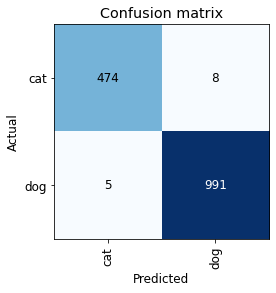

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

There were 482 cats in the dataset and 996 dogs.

**About how many of those images were classified correctly?**

About 99% of the images were classified correctly.

## Extension

**Test your classifier on a new image of a dog or a cat. How well does it do?**

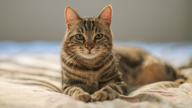

In [21]:
img = PILImage.create('images/cat_test.jpg')
img.to_thumb(192)

In [28]:
is_cat,_,probs = learn.predict(img)
print(f"This is a {is_cat}.")
print(f"Probability it's a cat: {probs[0].item():.6f}")

This is a cat.
Probability it's a cat: 1.000000
